In [754]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

In [755]:
# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

In [756]:
# Load the CSV data
file_path = 'part-00000-a6df1d30-a8df-4b59-99e9-fdd79f232e52-c000.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

In [757]:
# Function to clean brand names by tokenizing and normalizing them
def clean_brand(brand):
    doc = nlp(brand)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    if tokens:
        print(tokens)
        return tokens[0]  # Return the first significant token
    else:
        return brand.lower()  # Fallback to the entire brand in lowercase

In [758]:
# Apply the cleaning function to the brand column
df['clean_brand'] = df['brand'].apply(clean_brand)

['175x']
['310apple']
['airlines', 'airlines', 'airline']
['amazing', 'brand', 'rank', 'movement', 'nice']
['amazon']
['amazona', 'hrefhttpswwwyoutubecomwatchvbqovquga0veampt298458a']
['american', 'brand']
['american', 'girlbr5', 'microsoftbr6', 'cocacolabr7']
['anb']
['android']
['anlald', 'geleceimizin', 'kaderi', 'teknoloji']
['aos', 'luz']
['aos', 'revienta']
['apple']
['apple', ' ', 'boutta']
['apple', 'hrefhttpswwwyoutubecomwatchvbqovquga0veampt190310a']
['apple', 'ahhhhhhhhhhhhh']
['apple']
['apple', 'bcomesbbreditor']
['apple', 'bentersbbrnokia']
['apple', 'bexcuse']
['apple', 'bmove', 'bitch']
['apple', 'brand', 'value']
['apple', 'brbrbrbrbrbrbrbrsearch']
['apple', 'brbrlike']
['apple', 'chinaed']
['apple', 'coca', 'cola', ' ', 'tserie', 'vs', 'pewd']
['apple', 'crecan', 'rpido', 'brbra', 'm']
['apple', 'dang']
['apple', 'don39']
['apple', 'es']
['apple', 'esta', 'sobrevalorado', 'son', 'puro', 'postureo', 'porque']
['apple', 'existsbrcoca', 'cola']
['apple', 'flewwww']
['app

In [759]:
# Handle missing values
df['positive_category_sum'] = df['positive_category_sum'].fillna(0)
df['negative_category_sum'] = df['negative_category_sum'].fillna(0)

In [760]:
# Calculate total_category_sum if missing
df['total_category_sum'] = df.apply(
    lambda row: row['positive_category_sum'] + row['negative_category_sum'] 
    if pd.isnull(row['total_category_sum']) else row['total_category_sum'], axis=1
)

In [761]:
# Group by the cleaned brand names and sum the categories
grouped_df = df.groupby('clean_brand').agg({
    'total_category_sum': 'sum',
    'positive_category_sum': 'sum',
    'negative_category_sum': 'sum'
}).reset_index()

In [762]:
# # Save the cleaned and aggregated data to a new CSV file
# output_file_path = 'cleaned_brands.csv'  # Replace with your desired output file path
# grouped_df.to_csv(output_file_path, index=False)

In [763]:
# Function to convert negative values to positive in a column
def convert_negative_to_positive(df, column):
    df[column] = df[column].abs()  # Use abs() to convert negatives to positives
    return df

In [764]:
# Convert negative values to positive in 'negative_category_sum'
df_plot = convert_negative_to_positive(df, 'negative_category_sum')

In [765]:
# Group by the cleaned brand names and sum the categories
grouped_df_plot  = df_plot .groupby('clean_brand').agg({
    'total_category_sum': 'sum',
    'positive_category_sum': 'sum',
    'negative_category_sum': 'sum'
}).reset_index()

In [766]:
# Calculate total sums
total_positive = grouped_df_plot['positive_category_sum'].sum()
total_negative = grouped_df_plot['negative_category_sum'].sum()
print(total_positive)
print(total_negative)

737.0
455.0


In [767]:
# Determine brands with less than 10% of total
threshold_positive = total_positive * 0.01
threshold_negative = total_negative * 0.01
print(threshold_positive)
print(threshold_negative)

7.37
4.55


In [768]:
# Separate major and other brands for positive_category_sum
positive_major_brands = grouped_df_plot[grouped_df_plot['positive_category_sum'] > threshold_positive]
positive_other_brands = grouped_df_plot[grouped_df_plot['positive_category_sum'] <= threshold_positive]

# Separate major and other brands for negative_category_sum
negative_major_brands = grouped_df_plot[grouped_df_plot['negative_category_sum'] > threshold_negative]
negative_other_brands = grouped_df_plot[grouped_df_plot['negative_category_sum'] <= threshold_negative]

In [769]:
# Combine 'Other' categories for positive and negative sums
other_positive_sum = positive_other_brands['positive_category_sum'].sum()
other_negative_sum = negative_other_brands['negative_category_sum'].sum()
print(other_positive_sum)
print(other_negative_sum)

114.0
53.0


In [770]:
# Create 'Other' row for positive_category_sum
positive_other_row = pd.DataFrame({
    'clean_brand': ['Other'],
    'total_category_sum': [other_positive_sum],
    'positive_category_sum': [other_positive_sum],  # Assign the total sum to positive sum for consistency
    'negative_category_sum': [0]  # Set negative sum to 0 for plotting purposes
})


In [771]:
# Create 'Other' row for negative_category_sum
negative_other_row = pd.DataFrame({
    'clean_brand': ['Other'],
    'total_category_sum': [other_negative_sum],
    'positive_category_sum': [0],  # Set positive sum to 0 for plotting purposes
    'negative_category_sum': [other_negative_sum]  # Assign the total sum to negative sum for consistency
})

In [772]:
# Combine major brands and 'Other' rows for positive_category_sum
final_positive_df = pd.concat([positive_major_brands, positive_other_row], ignore_index=True).sort_values(by='positive_category_sum', ascending=True)

# Combine major brands and 'Other' rows for negative_category_sum
final_negative_df = pd.concat([negative_major_brands, negative_other_row], ignore_index=True).sort_values(by='negative_category_sum', ascending=True)

In [773]:
# Plotting
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

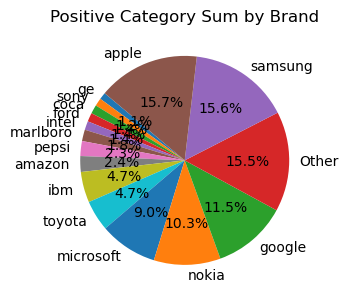

In [774]:
# Plotting positive_category_sum
plt.subplot(1, 2, 1)
plt.pie(final_positive_df['positive_category_sum'], labels=final_positive_df['clean_brand'], autopct='%1.1f%%', startangle=140)
plt.title('Positive Category Sum by Brand')
plt.tight_layout()

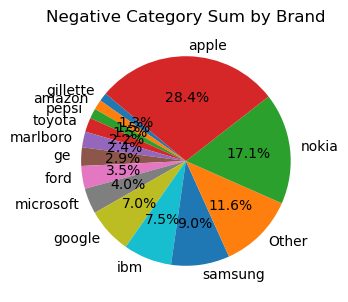

In [775]:
# Plotting negative_category_sum
plt.subplot(1, 2, 2)
plt.pie(final_negative_df['negative_category_sum'], labels=final_negative_df['clean_brand'], autopct='%1.1f%%', startangle=140)
plt.title('Negative Category Sum by Brand')
plt.tight_layout()

In [776]:
# Clear the previous plot
plt.clf()
plt.close()

In [777]:
# Create sets for major brands
positive_major_set = set(positive_major_brands['clean_brand'])
negative_major_set = set(negative_major_brands['clean_brand'])
print(positive_major_set)
print(negative_major_set)

{'amazon', 'intel', 'microsoft', 'toyota', 'ge', 'samsung', 'apple', 'google', 'ibm', 'pepsi', 'nokia', 'marlboro', 'ford', 'coca', 'sony'}
{'amazon', 'toyota', 'microsoft', 'ge', 'samsung', 'apple', 'google', 'ibm', 'pepsi', 'nokia', 'marlboro', 'ford', 'gillette'}


In [778]:
# Union of positive_major_brands and negative_major_brands
union_major_brands = positive_major_set.union(negative_major_set)

In [779]:
print(union_major_brands)

{'intel', 'microsoft', 'ge', 'google', 'nokia', 'coca', 'sony', 'amazon', 'toyota', 'samsung', 'apple', 'pepsi', 'ibm', 'marlboro', 'ford', 'gillette'}


In [780]:
# Align positive_major_brands and negative_major_brands with union_major_brands
positive_major_brands = grouped_df[grouped_df['clean_brand'].isin(union_major_brands)].fillna(0)
negative_major_brands = grouped_df[grouped_df['clean_brand'].isin(union_major_brands)].fillna(0)

In [796]:
# Remove brands in positive_other_brands that are in negative_major_brands
positive_other_brands = positive_other_brands[~positive_other_brands['clean_brand'].isin(negative_major_set)]

# Remove brands in negative_other_brands that are in positive_major_brands
negative_other_brands = negative_other_brands[~negative_other_brands['clean_brand'].isin(positive_major_set)]
print(positive_other_brands)
print(negative_other_brands)

       clean_brand  total_category_sum  positive_category_sum  \
0             175x                   1                    1.0   
1         310apple                   0                    0.0   
2         airlines                   0                    0.0   
3          amazing                  -1                    0.0   
5          amazona                   0                    0.0   
..             ...                 ...                    ...   
245          yahoo                   0                    0.0   
246         yamaha                   0                    0.0   
247         yooooo                   0                    0.0   
248     youbrapple                   1                    1.0   
249  youtubebr2012                   1                    1.0   

     negative_category_sum  
0                      0.0  
1                      0.0  
2                      0.0  
3                      1.0  
5                      0.0  
..                     ...  
245             

In [782]:
# Combine 'Other' categories for positive and negative sums
other_positive_sum = positive_other_brands['positive_category_sum'].sum()
other_negative_sum = -negative_other_brands['negative_category_sum'].sum()

In [783]:
# Create 'Other' row for positive_category_sum
positive_other_row = pd.DataFrame({
    'clean_brand': ['Other'],
    'total_category_sum': [other_positive_sum],
    'positive_category_sum': [other_positive_sum],  # Assign the total sum to positive sum for consistency
    'negative_category_sum': [0]  # Set negative sum to 0 for plotting purposes
})

In [784]:
# Create 'Other' row for negative_category_sum
negative_other_row = pd.DataFrame({
    'clean_brand': ['Other'],
    'total_category_sum': [other_negative_sum],
    'positive_category_sum': [0],  # Set positive sum to 0 for plotting purposes
    'negative_category_sum': [other_negative_sum]  # Assign the total sum to negative sum for consistency
})

In [785]:
# Combine major brands and 'Other' rows for positive_category_sum
final_positive_df = pd.concat([positive_major_brands, positive_other_row], ignore_index=True).sort_values(by='positive_category_sum', ascending=False)

# Combine major brands and 'Other' rows for negative_category_sum
final_negative_df = pd.concat([negative_major_brands, negative_other_row], ignore_index=True).sort_values(by='negative_category_sum', ascending=True)

In [786]:
print(final_negative_df)

   clean_brand  total_category_sum  positive_category_sum  \
1        apple               -13.0                  116.0   
11       nokia                -2.0                   76.0   
13     samsung                74.0                  115.0   
7          ibm                 1.0                   35.0   
6       google                53.0                   85.0   
10   microsoft                48.0                   66.0   
3         ford                -6.0                   10.0   
4           ge                -5.0                    8.0   
9     marlboro                 2.0                   13.0   
15      toyota                25.0                   35.0   
0       amazon                11.0                   18.0   
12       pepsi                10.0                   17.0   
5     gillette                 0.0                    6.0   
14        sony                 5.0                    9.0   
8        intel                 8.0                   10.0   
2         coca          

In [787]:
# Ensure both dataframes have the same brands and order
# common_brands = final_positive_df['clean_brand'].tolist()
# final_negative_df = final_negative_df[final_negative_df['clean_brand'].isin(common_brands)]

In [788]:
# Align final_negative_df with the order of final_positive_df
final_negative_df = final_negative_df.set_index('clean_brand').reindex(index=final_positive_df['clean_brand']).reset_index()

In [789]:
print(final_negative_df)

   clean_brand  total_category_sum  positive_category_sum  \
0        apple               -13.0                  116.0   
1      samsung                74.0                  115.0   
2        Other                46.0                    0.0   
3       google                53.0                   85.0   
4        nokia                -2.0                   76.0   
5    microsoft                48.0                   66.0   
6       toyota                25.0                   35.0   
7          ibm                 1.0                   35.0   
8       amazon                11.0                   18.0   
9        pepsi                10.0                   17.0   
10    marlboro                 2.0                   13.0   
11        ford                -6.0                   10.0   
12        coca                 9.0                   10.0   
13       intel                 8.0                   10.0   
14        sony                 5.0                    9.0   
15          ge          

In [790]:
print(final_positive_df)

   clean_brand  total_category_sum  positive_category_sum  \
1        apple               -13.0                  116.0   
13     samsung                74.0                  115.0   
16       Other               108.0                  108.0   
6       google                53.0                   85.0   
11       nokia                -2.0                   76.0   
10   microsoft                48.0                   66.0   
15      toyota                25.0                   35.0   
7          ibm                 1.0                   35.0   
0       amazon                11.0                   18.0   
12       pepsi                10.0                   17.0   
9     marlboro                 2.0                   13.0   
3         ford                -6.0                   10.0   
2         coca                 9.0                   10.0   
8        intel                 8.0                   10.0   
14        sony                 5.0                    9.0   
4           ge          

In [791]:
# Plotting
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [792]:
# Create the mirrored histogram
brands = final_positive_df['clean_brand']
positive_values = final_positive_df['positive_category_sum']
negative_values = final_negative_df['negative_category_sum']

In [793]:
# Define bin positions and heights
n_bins = len(brands)
bin_width = 0.35

<BarContainer object of 17 artists>

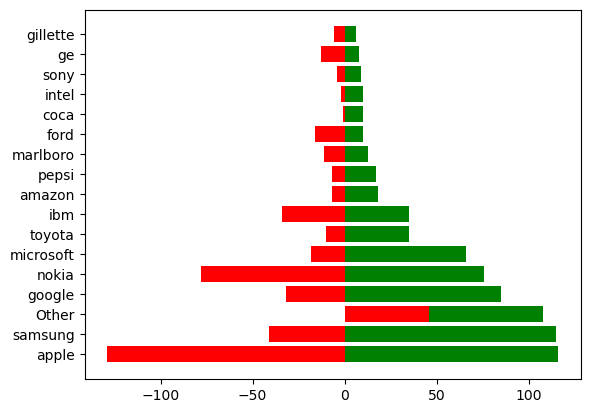

In [794]:
# Plot positive values (top histogram)
plt.barh(brands, positive_values, color='g', align='center')

# Plot negative values (bottom histogram, converted to positive for visualization)
plt.barh(brands, negative_values, color='r', align='center')

In [795]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>